In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
print(tf.__version__)

2.12.0


In [3]:
from sklearn.datasets import make_circles

n_samples = 1000 

X, y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:5]

array([1, 1, 1, 1, 0])

In [8]:
import pandas as pd 

df = pd.DataFrame({
    
    "X0": X[:, 0], "X1":X[:, 1], "label": y
})

df.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [10]:
df.label.value_counts()

1    500
0    500
Name: label, dtype: int64

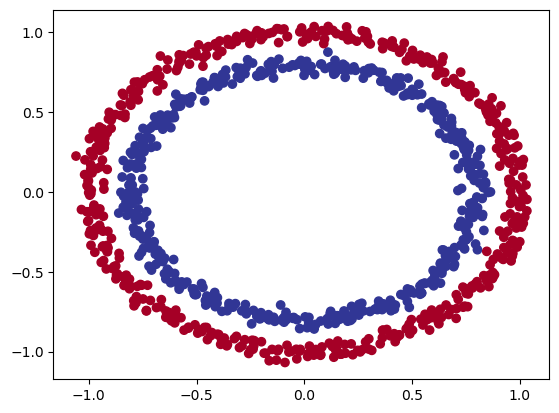

In [20]:
import matplotlib.pyplot as plt 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

**Goal**: Build A Deep Learning Model To Predict Blue And Red Dots

In [21]:
X.shape, y.shape

((1000, 2), (1000,))

In [22]:
len(X), len(y)

(1000, 1000)

In [24]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [34]:
# creating our first model 

tf.random.set_seed(42)

model_1 = keras.Sequential([
    
    layers.Dense(1)
])

model_1.compile(
    
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.SGD(),
    metrics = keras.metrics.Accuracy()
)

model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 6.1122 - accuracy: 0.0000e+00
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 6.4193 - accuracy: 0.0000e+00
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.0000e+00
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.0000e+00
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.0000e+00


In [35]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.0000e+00


[7.6246185302734375, 0.0]

In [32]:
# let's train again 
model_1.fit(X, y, epochs = 200, verbose = 0)

In [33]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.0000e+00


[7.712474346160889, 0.0]

In [38]:
# let's add another layer
tf.random.set_seed(42)

model_2 = keras.Sequential([
    
    layers.Dense(1),
    layers.Dense(1)
])

model_2.compile(
    
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.SGD(),
    metrics = keras.metrics.Accuracy(),
    
)

model_2.fit(X, y, epochs = 100, verbose = 0)

In [39]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.0000e+00


[0.693286120891571, 0.0]

In [41]:
tf.random.set_seed(42)

model_3 = keras.Sequential(
[
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

model_3.compile(
   
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.SGD(),
    metrics = keras.metrics.Accuracy()
)

model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.0000e+00
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.0000e+00
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.0000e+00
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.0000e+00
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.0000e+00
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.0000e+00
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss:

Model is not improving. Let's plot and see

In [61]:
import numpy as np

def plot_decision_boundary(model, X, y):
    
    """ Plots Decision Boundary Of The Model"""
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together
    
    y_pred = model.predict(x_in) 
    
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred,cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


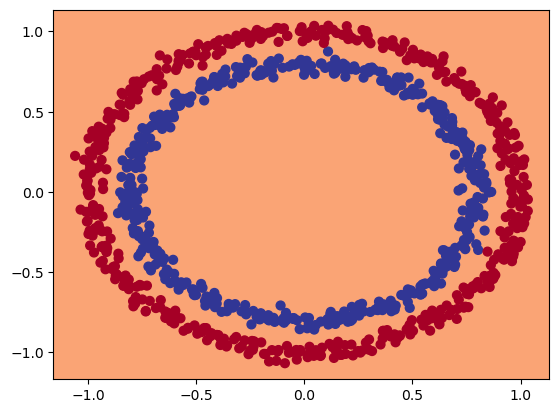

In [62]:
plot_decision_boundary(model_3, X, y)

In [64]:
# let's add non-linear Activation and see our new model 

model_4 = keras.Sequential([
    
    layers.Dense(1, activation = "relu"),
    layers.Dense(1)
])

model_4.compile(
   
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.SGD(),
    metrics = keras.metrics.Accuracy()

)

model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.2510
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.2510
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.2510
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.2510
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.2510
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.2510
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.2510
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.2510
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.2510
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.2510
Epoch 11/

In [68]:
# let's try with more neurons 

model_5 = keras.Sequential([
    
    layers.Dense(4, activation = "relu"),
    layers.Dense(4, activation = "relu"),
    layers.Dense(1)
])

model_5.compile(
  
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(lr = 0.001),
    metrics = keras.metrics.Accuracy()
)

model_5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 7.7125 - accuracy: 0.0000e+00
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.0000e+00
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.0000e+00
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.0000e+00
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.0000e+00
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.0000e+00
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss:

In [69]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.0000e+00


[7.712474346160889, 0.0]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


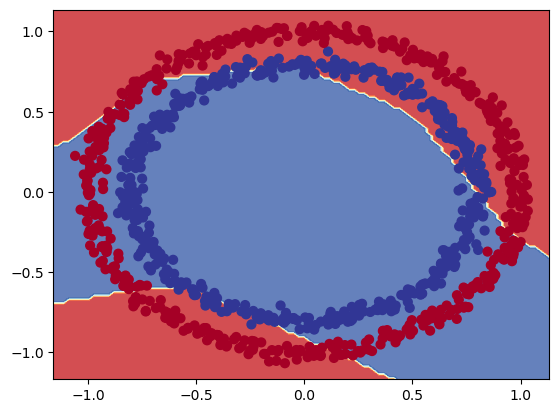

In [70]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_5, X, y)

In [74]:
# let's build another model 

model_6 = keras.Sequential([
    
    layers.Dense(4, activation = 'relu'),
    layers.Dense(4, activation = 'relu'), 
    layers.Dense(1, activation = 'sigmoid')
])

model_6.compile(

   loss = keras.losses.BinaryCrossentropy(),
   optimizer = keras.optimizers.Adam(),
   metrics = keras.metrics.Accuracy()
)

model_6.fit(X, y, epochs = 100, verbose = 0)

In [75]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2697 - accuracy: 0.0000e+00


[0.2697046399116516, 0.0]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


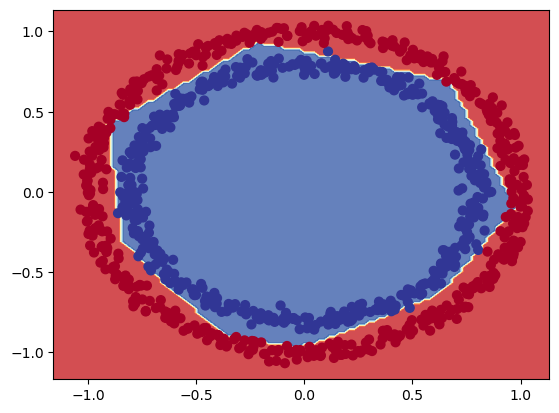

In [76]:
plot_decision_boundary(model_6, X, y)

In [77]:
# let's create train and test set and train our model again 

X_train, y_train = X[:800], y[:800] 
X_test, y_test = X[800:], y[800:] 
X_train.shape, X_test.shape 
     

((800, 2), (200, 2))

In [85]:
model_7 = keras.Sequential([
    
    layers.Dense(4, activation = "relu"),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model_7.compile(
   
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(lr = 0.01),
    metrics = keras.metrics.Accuracy()
)

history = model_7.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.6991 - accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.0000e+00
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.0000e+00
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.0000e+00
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.0000e+00
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.0000e+00
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss:

In [86]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.0000e+00


[0.6282349824905396, 0.0]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 2ms/step
doing binary classifcation...


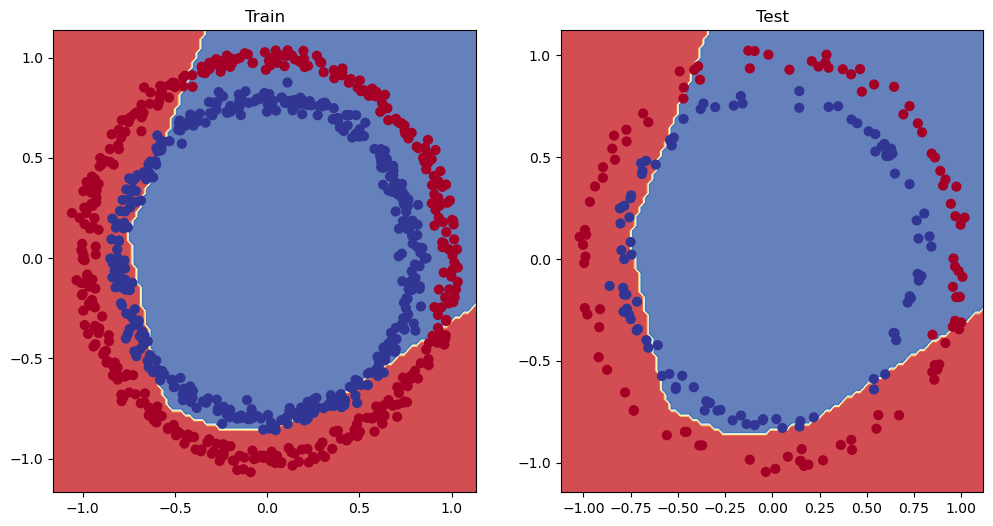

In [87]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, X=X_test, y=y_test)
plt.show()

In [88]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.699075,0.0
1,0.696551,0.0
2,0.694913,0.0
3,0.693744,0.0
4,0.692912,0.0
...,...,...
95,0.618674,0.0
96,0.616992,0.0
97,0.614972,0.0
98,0.613240,0.0


<Axes: >

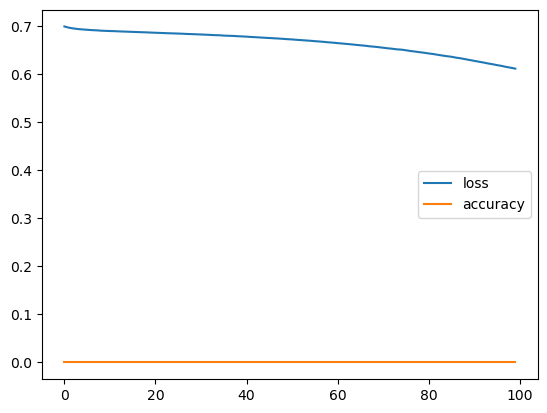

In [89]:
pd.DataFrame(history.history).plot()

In [92]:
# let's find a good learning rate for our model

model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss = keras.losses.BinaryCrossentropy(),
               optimizer = keras.optimizers.Adam(),
               metrics = keras.metrics.Accuracy())

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_8.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7018 - accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.0000e+00 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.0000e+00 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.0000e+00 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.0000e+00 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.0000e+00 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.0000e+00 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6995 - accuracy: 0.0000e+00 - lr: 2.2387e-04
Epoch 9/100
25/25 [=====================

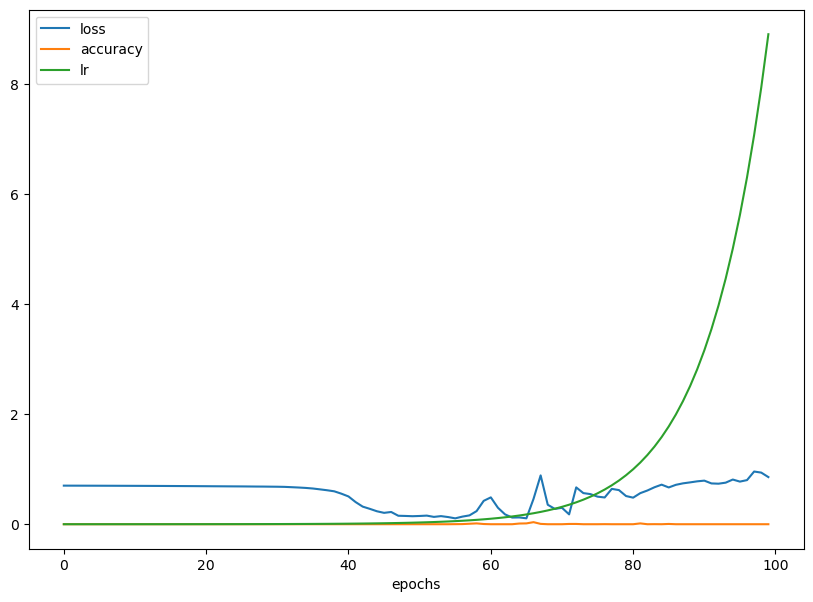

In [94]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

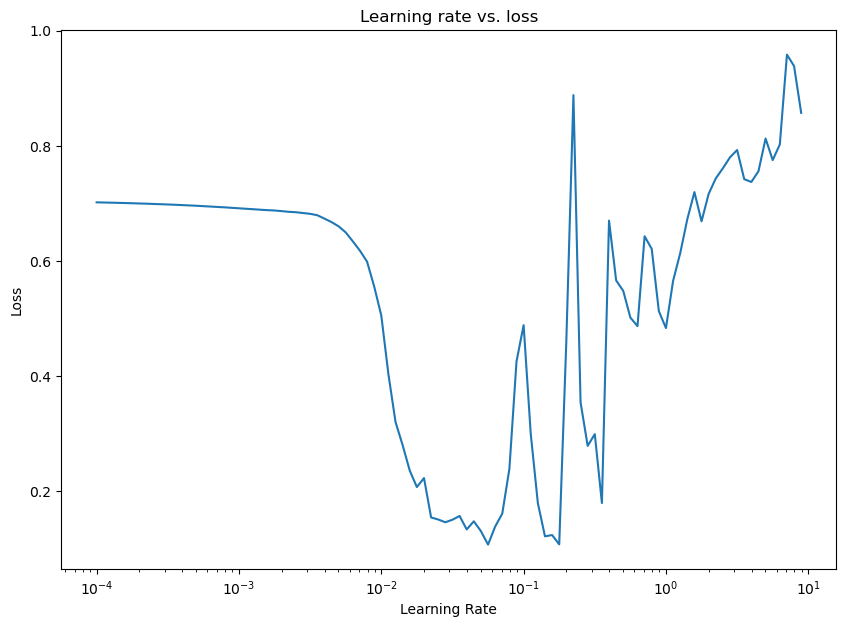

In [95]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [96]:
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])


history = model_9.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5063
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5025
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5175
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5225
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5400
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5238
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5225
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5263
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5462
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5375
Epoch 11/20
25/25 [

In [97]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5450


[0.6857455372810364, 0.5450000166893005]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


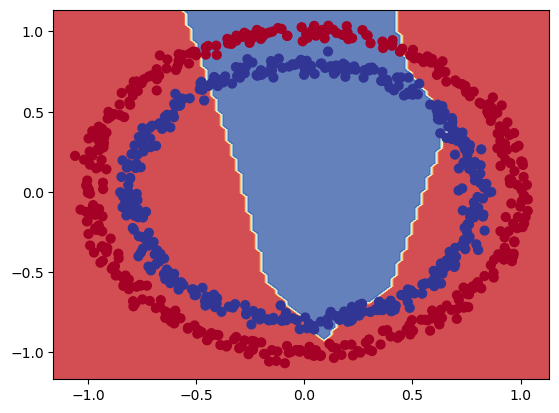

In [98]:
plot_decision_boundary(model_9, X=X_train, y=y_train)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


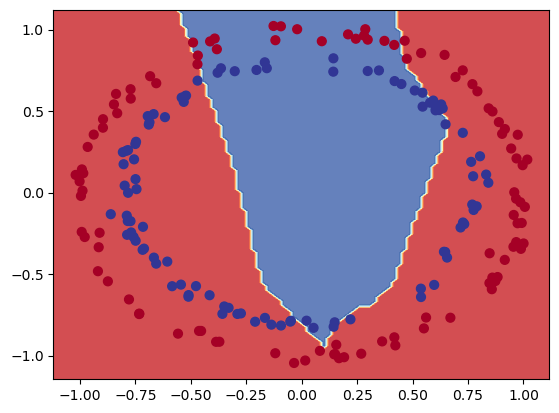

In [99]:
plot_decision_boundary(model_9, X=X_test, y=y_test)

In [123]:
# let's create a confusion metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report
y_preds = model_9.predict(X_test)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm 

7/7 [==============================] - 0s 2ms/step


array([[84, 17],
       [74, 25]])

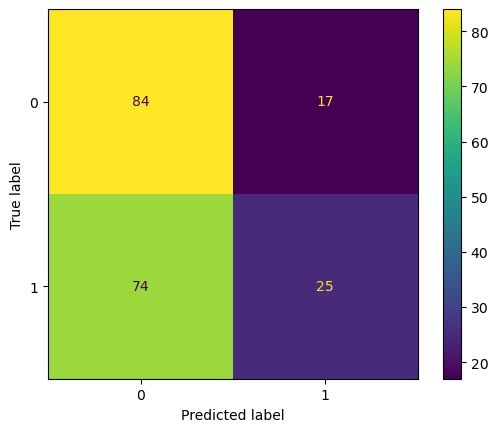

In [124]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [131]:
print(classification_report(y_test, tf.round(y_preds)))

roc_auc_score(y_test, tf.round(y_preds))

              precision    recall  f1-score   support

           0       0.53      0.83      0.65       101
           1       0.60      0.25      0.35        99

    accuracy                           0.55       200
   macro avg       0.56      0.54      0.50       200
weighted avg       0.56      0.55      0.50       200



0.5421042104210422

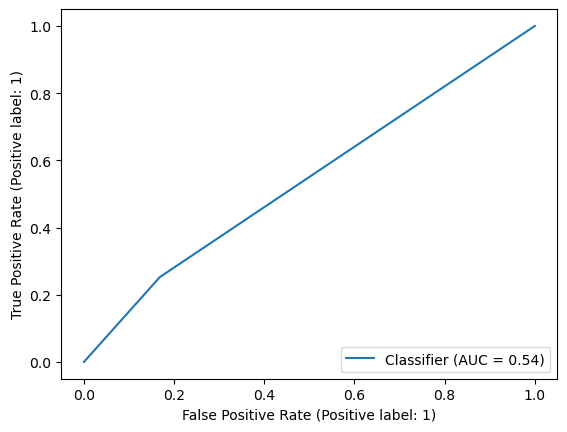

In [134]:
from sklearn.metrics import RocCurveDisplay 
RocCurveDisplay.from_predictions(y_test, tf.round(y_preds));

Well, our model still needs improvement!! 